In [1]:
import pandas as pd

df = pd.read_csv("data/final_matches.csv")

In [2]:
df.describe()

,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3102.000000,0.0,3800.000000,3800.000000,3799.000000,3800.000000,3800.000000,3800.000000,3800.0000
mean,1.457895,1.457895,1.404000,1.404000,50.000526,39007.501612,NaN,12.729474,4.276842,17.132087,0.408158,0.111842,0.136053,2023.0000
std,1.298273,1.298273,0.827715,0.827715,12.506971,17158.719815,NaN,5.594151,2.449101,2.950263,0.630861,0.339342,0.372332,1.4144
min,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,5.300000,0.000000,0.000000,0.000000,2021.0000
25%,0.000000,0.000000,0.800000,0.800000,41.000000,27072.500000,NaN,9.000000,3.000000,15.200000,0.000000,0.000000,0.000000,2022.0000
50%,1.000000,1.000000,1.300000,1.300000,50.000000,36447.000000,NaN,12.000000,4.000000,17.000000,0.000000,0.000000,0.000000,2023.0000
75%,2.000000,2.000000,1.900000,1.900000,59.000000,53103.500000,NaN,16.000000,6.000000,18.900000,1.000000,0.000000,0.000000,2024.0000
max,9.000000,9.000000,7.000000,7.000000,82.000000,75546.000000,NaN,37.000000,16.000000,39.900000,4.000000,3.000000,3.000000,2025.0000


In [3]:
df.describe(include="str")

,date,time,comp,round,day,venue,result,opponent,captain,formation,opp formation,referee,match report,team
count,3800,3800,3800,3800,3800,3800,3800,3800,3800,3800,3800,3800,3800,3800
unique,604,24,1,38,7,2,3,27,189,22,21,36,1,27
top,2021-05-23,15:00,Premier League,Matchweek 1,Sat,Away,W,West Ham,Lewis Dunk,4-2-3-1,4-2-3-1,Anthony Taylor,Match Report,Arsenal
freq,20,1120,3800,100,1716,1900,1467,190,154,1330,1330,288,3800,190


In [4]:
# df_referee = df[['referee']].drop_duplicates()

# df_referee.loc[:,'win_local'] = df_referee['referee'].apply(lambda x: df[(df['referee']==x) & (df['result']=='W')].shape[0])
# df_referee.loc[:,'loses_local'] = df_referee['referee'].apply(lambda x: df[(df['referee']==x) & (df['result']=='L')].shape[0])
# df_referee.loc[:,'draw'] = df_referee['referee'].apply(lambda x: df[(df['referee']==x) & (df['result']=='D')].shape[0])

# df_referee.loc[:,'total_matchs'] = df_referee['win_local']+df_referee['loses_local']+df_referee['draw']

# Buscar si un arbitro favorece más al equipo local o visitante

In [5]:
#sacamos valores unicos por temporada, arbitro y jornada ya 
df_referee = df.drop_duplicates(subset=['round','referee','season'])

In [6]:
df_referee = df_referee.groupby(["referee", "result"]).size().unstack(fill_value=0)
df_referee = df_referee.rename(
    columns={"W": "win_local", "L": "loses_local", "D": "draw"}
)
df_referee.loc[:, "total_matchs"] = (
    df_referee["win_local"] + df_referee["loses_local"] + df_referee["draw"]
)


In [7]:
df_referee.sort_values(by="total_matchs", ascending=False).head()

result,draw,loses_local,win_local,total_matchs
referee,,,,
Anthony Taylor,41,41,59,141
Michael Oliver,25,43,66,134
Craig Pawson,25,44,40,109
Stuart Attwell,20,39,44,103
Simon Hooper,25,28,50,103


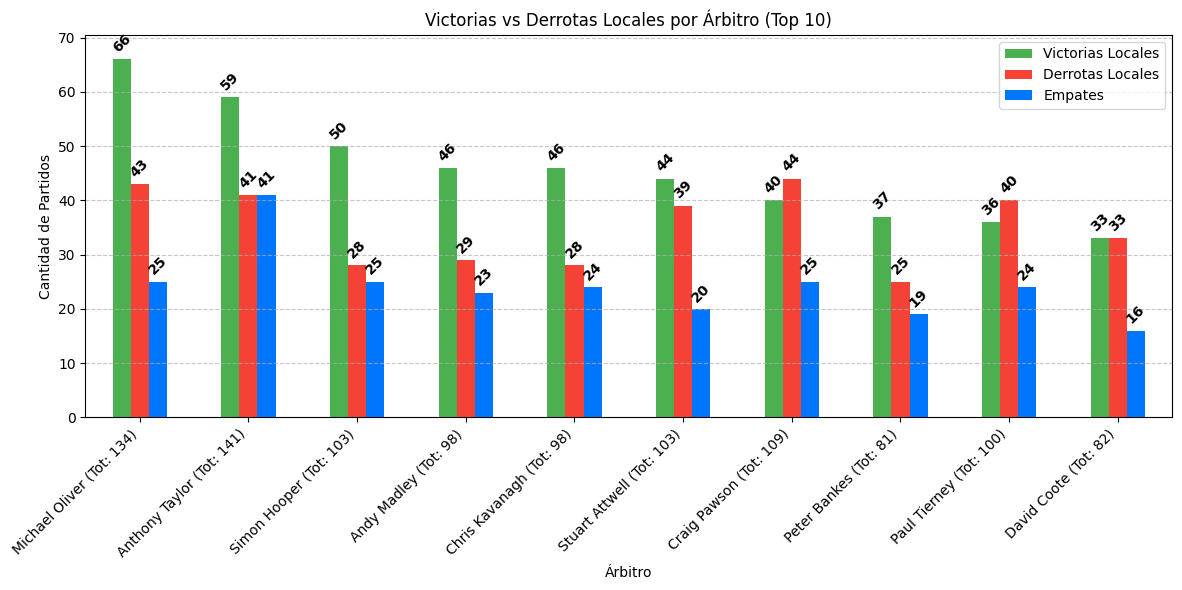

In [8]:
import matplotlib.pyplot as plt

# Ordenar y filtrar para que la gráfica sea legible
top_referees = df_referee.sort_values(by="win_local", ascending=False).head(10)

# Total de partidos dirigidos
referee_total = [
    f"{ref} (Tot: {tot})"
    for ref, tot in zip(top_referees.index, top_referees["total_matchs"])
]


# Crear la gráfica
ax = top_referees[["win_local", "loses_local", "draw"]].plot(
    kind="bar", figsize=(12, 6), color=["#4CAF50", "#F44336", "#0076FD"]
)


for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight="bold", rotation=45)

# asignar nuevo la etiqueta con el total de partidos dirigidos
ax.set_xticklabels(referee_total, rotation=45, ha="right")

plt.title("Victorias vs Derrotas Locales por Árbitro (Top 10)")
plt.xlabel("Árbitro")
plt.ylabel("Cantidad de Partidos")
plt.xticks(rotation=45)
plt.legend(["Victorias Locales", "Derrotas Locales", "Empates"])
ax.set_ylim(0, top_referees.values.max() / 2)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

% de arbitros que favorecen el equipo local 58.333333333333336


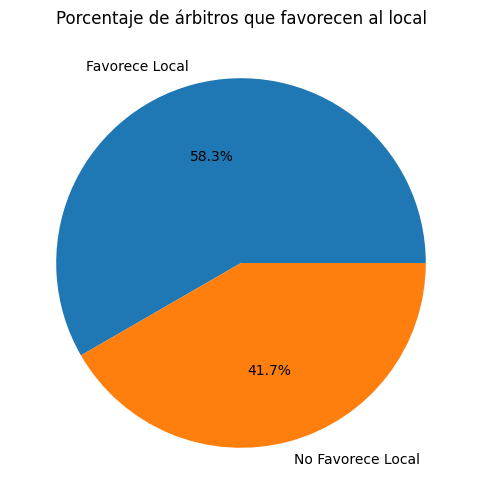

In [9]:
df_referee.loc[:,'favorece_local'] = df_referee['win_local'] > df_referee['loses_local'] 

sum_referee,fav_local,fav_vist = [df_referee.shape[0],df_referee[df_referee['favorece_local']==True].shape[0],df_referee[df_referee['favorece_local']==False].shape[0]]

print("% de arbitros que favorecen el equipo local",(fav_local/sum_referee)*100)

plt.figure(figsize=(6,6))
plt.pie(
    [fav_local, fav_vist],
    labels=['Favorece Local', 'No Favorece Local'],
    autopct='%1.1f%%'
)

plt.title('Porcentaje de árbitros que favorecen al local')
plt.show()

# Buscamos los equipos más goleadores de la premier

In [10]:
team_goals = df[["team"]].drop_duplicates()

team_goals.loc[:, "goals_at_home"] = team_goals["team"].apply(
    lambda x: df[df["team"] == x]["gf"].sum()
)
team_goals.loc[:, "goals_as_visitor"] = team_goals["team"].apply(
    lambda x: df[df["team"] == x]["ga"].sum()
)
team_goals.loc[:, "goals_total"] = (
    team_goals["goals_at_home"] + team_goals["goals_as_visitor"]
)

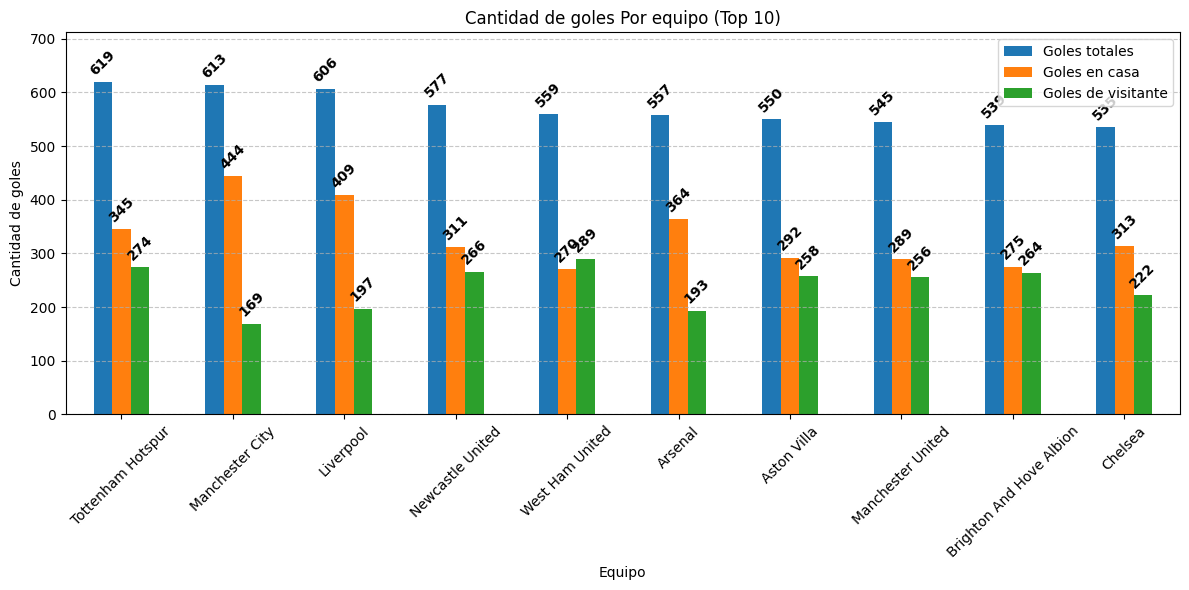

In [11]:
top_team_score = team_goals.sort_values(by="goals_total", ascending=False).head(10)

ax = top_team_score.set_index("team")[
    ["goals_total", "goals_at_home", "goals_as_visitor"]
].plot(kind="bar", figsize=(12, 6))


for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, fontweight="bold", rotation=45)

plt.title("Cantidad de goles Por equipo (Top 10)")
plt.xlabel("Equipo")
plt.ylabel("Cantidad de goles")
plt.xticks(rotation=45)
plt.legend(["Goles totales", "Goles en casa", "Goles de visitante"])
ax.set_ylim(0, top_team_score["goals_total"].max() * 1.15)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

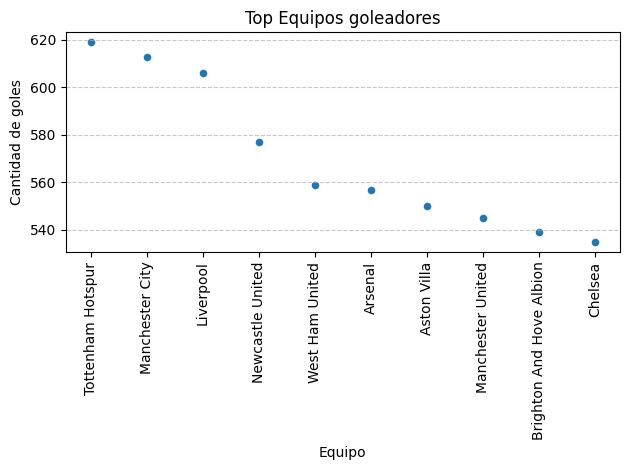

In [12]:
team_goals.sort_values(by="goals_total", ascending=False).head(10).plot.scatter(
    x="team", y="goals_total"
)

plt.title("Top Equipos goleadores")
plt.xlabel("Equipo")
plt.ylabel("Cantidad de goles")
plt.xticks(rotation=90)

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [13]:
# hacemos unico el equipo y la temporada
team_season_g = df[["team", "season"]].drop_duplicates()

# contamos la cantidad de goles realizados por equipo y por temporada
team_season_g.loc[:, "gf"] = team_season_g.apply(
    lambda x: df[(df["team"] == x["team"]) & (df["season"] == x["season"])]["gf"].sum(),
    axis=1,
)

team_season_g.loc[:, "ga"] = team_season_g.apply(
    lambda x: df[(df["team"] == x["team"]) & (df["season"] == x["season"])]["ga"].sum(),
    axis=1,
)

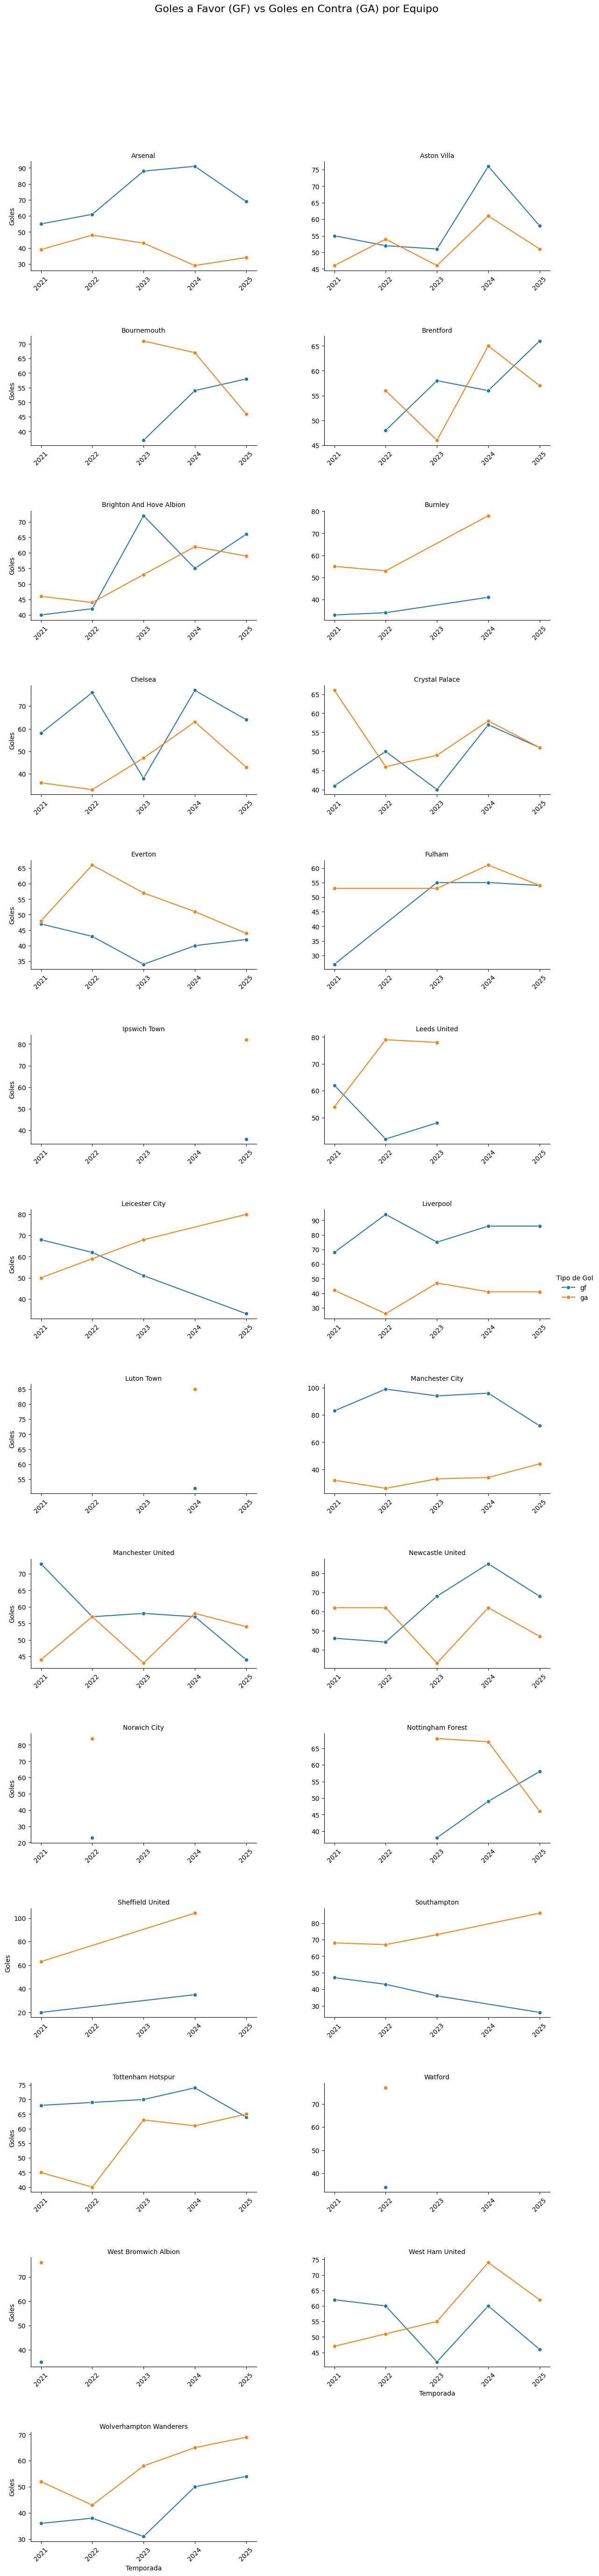

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# El primer paso es preparar los datos a formato "largo"
# Esto crea una columna con el nombre 'tipo' (para GF o GA) y otra con el valor
df_melted = team_season_g.melt(
    id_vars=["team", "season"],
    value_vars=["gf", "ga"],
    var_name="tipo",
    value_name="goles",
)


# 1. Crear la estructura
g = sns.FacetGrid(
    df_melted, col="team", hue="tipo", col_wrap=2, height=4, aspect=1.5, sharey=False
)

# 2. Dibujar las líneas
g.map(sns.lineplot, "season", "goles", marker="o")

# 3. FORZAR las etiquetas en TODOS los ejes (La solución al problema)
anios_unicos = sorted(df["season"].unique())

for ax in g.axes.flat:
    ax.set_xticks(anios_unicos)
    ax.set_xticklabels(anios_unicos, rotation=45)
    ax.tick_params(
        labelbottom=True
    )  # <--- Esta es la línea mágica que obliga a mostrar etiquetas

# 4. Ajustes estéticos finales
g.add_legend(title="Tipo de Gol")
g.set_titles("{col_name}")
g.set_axis_labels("Temporada", "Goles")

# Ajuste de espacios para que no se solapen
plt.subplots_adjust(top=0.92, wspace=0.3, hspace=0.6)
g.fig.suptitle("Goles a Favor (GF) vs Goles en Contra (GA) por Equipo", fontsize=16)

plt.show()